In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import json
from networkx.readwrite import json_graph
import os

# Grafo melhor caso

In [1]:

def generate_best_graph(nodes_quantity: int):
    graph = nx.Graph()
    graph.add_nodes_from(range(1, nodes_quantity + 1))
    # Nó central é o 1, conecta a todos os outros
    edges = [(1, i) for i in range(2, nodes_quantity + 1)]
    graph.add_edges_from(edges)
    return graph


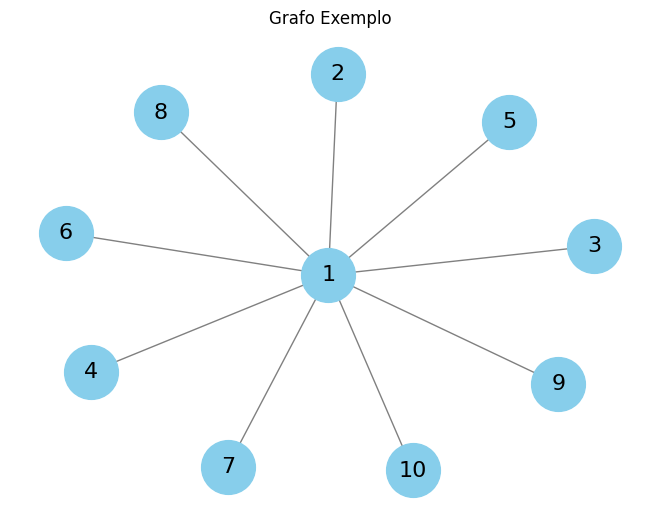

In [3]:
NODES_p = 10
Grafo_p = generate_best_graph(NODES_p)

if NODES_p <= 100:
    pos = nx.spring_layout(Grafo_p)
    nx.draw(Grafo_p, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=16)
    plt.title("Grafo Exemplo")
    plt.show()

# Grafo medio caso

In [4]:
def create_graph(nodes_quantity : int):
    graph = nx.Graph()
    graph.add_nodes_from(range(1, nodes_quantity + 1))

    edges = []
    for i in range(1, nodes_quantity + 1):
        predecessor = i - 1 if i > 1 else nodes_quantity
        successor = i + 1 if i < nodes_quantity else 1

        # Escolhe um nó aleatório diferente de i, predecessor e successor
        while True:
            random_node = random.randint(1, nodes_quantity)
            if random_node not in {i, predecessor, successor}:
                break

        edges.append((i, predecessor))
        edges.append((i, successor))
        edges.append((i, random_node))

    graph.add_edges_from(edges)
    return graph

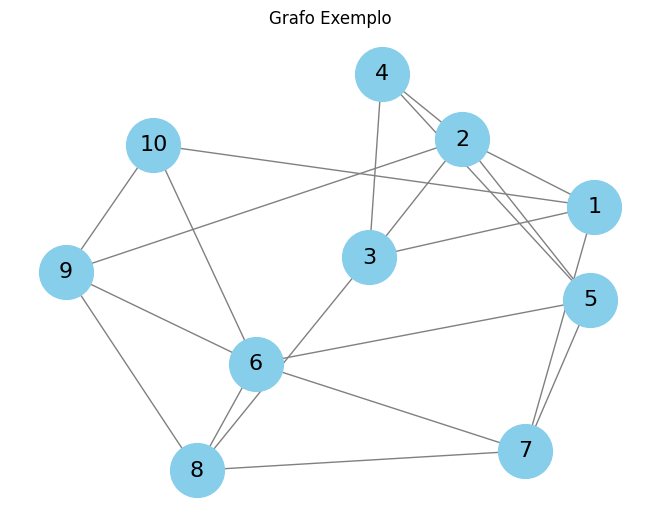

In [5]:
NODES = 10
Grafo_p = create_graph(NODES)

if NODES <= 100:
    pos = nx.spring_layout(Grafo_p)
    nx.draw(Grafo_p, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=16)
    plt.title("Grafo Exemplo")
    plt.show()

# Grafo pior caso

In [6]:
def generate_worst_graph(nodes_quantity: int):
    graph = nx.Graph()
    graph.add_nodes_from(range(1, nodes_quantity + 1))
    # Adiciona arestas entre todos os pares de nós
    edges = [(i, j) for i in range(1, nodes_quantity + 1) for j in range(i + 1, nodes_quantity + 1)]
    graph.add_edges_from(edges)
    return graph


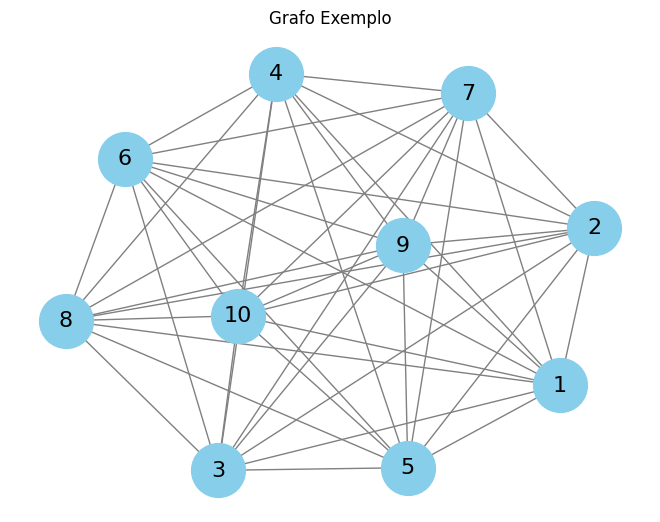

In [7]:
NODES = 10
Grafo_p = generate_worst_graph(NODES)

if NODES <= 100:
    pos = nx.spring_layout(Grafo_p)
    nx.draw(Grafo_p, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=1500, font_size=16)
    plt.title("Grafo Exemplo")
    plt.show()

# Salvar grafos em arquivo

## Pequeno 500 nós

In [12]:
NODES = 500
best_graph = generate_best_graph(NODES)
graph = create_graph(NODES)
worst_graph = generate_worst_graph(NODES)

os.makedirs('Graphs', exist_ok=True)

data_best = json_graph.node_link_data(best_graph, edges="links")
data_medium = json_graph.node_link_data(graph, edges="links")
data_worst = json_graph.node_link_data(worst_graph, edges="links")

with open("Graphs/grafo_P_melhor.json", "w") as f1:
    json.dump(data_best, f1, indent=2)
with open("Graphs/grafo_P_medio.json", "w") as f2:
    json.dump(data_medium, f2, indent=2)
with open("Graphs/grafo_P_pior.json", "w") as f3:
    json.dump(data_worst, f3, indent=2)

## Médio 1.000 nós

In [13]:
NODES = 1000
best_graph = generate_best_graph(NODES)
graph = create_graph(NODES)
worst_graph = generate_worst_graph(NODES)

data_best = json_graph.node_link_data(best_graph, edges="links")
data_medium = json_graph.node_link_data(graph, edges="links")
data_worst = json_graph.node_link_data(worst_graph, edges="links")

with open("Graphs/grafo_M_melhor.json", "w") as f1:
    json.dump(data_best, f1, indent=2)
with open("Graphs/grafo_M_medio.json", "w") as f2:
    json.dump(data_medium, f2, indent=2)
with open("Graphs/grafo_M_pior.json", "w") as f3:
    json.dump(data_worst, f3, indent=2)

## Grande 5.000 nós

In [7]:
NODES = 5000
best_graph = generate_best_graph(NODES)
graph = create_graph(NODES)
worst_graph = generate_worst_graph(NODES)

data_best = json_graph.node_link_data(best_graph, edges="links")
data_normal = json_graph.node_link_data(graph, edges="links")
data_worst = json_graph.node_link_data(worst_graph, edges="links")

with open("Graphs/grafo_G_melhor.json", "w") as f1:
    json.dump(data_best, f1, indent=2)
with open("Graphs/grafo_G_medio.json", "w") as f2:
    json.dump(data_normal, f2, indent=2)
with open("Graphs/grafo_G_pior.json", "w") as f3:
    json.dump(data_worst, f3, indent=2)